# Pré-processamento dos dados com Python

Para este hands on vamos usar o [Data Set do Titanic disponível no Kaggle](https://www.kaggle.com/c/titanic). Este é um conjunto de dados muito famoso. O dataset disponibiliza informações dos passageiros que nos permite aplicar algoritmos de aprendizagem supervisionada para prever se um passageiro sobrevivereu ou não.

Antes de aplicarmos algum classificador para este problema vamos realizar o pré-processamento dos dados.

Este dataset já está parcialmente pré-processado, mas se quiser usar o conjunto de dados original, hospedado diretamente no Kaggle, será um desafio interessante =D.

## O Dicionário de Dados

**Survival**: Sobrevivente (Não=0, Sim=1)

**Pclass**: Classe de ingresso (1=1st, 2=2nd, 3=3rd)

**Sex**: Sexo

**Age**: Idade em anos

**Sibsp**: Quantidade de irmãos e cônjuges a bordo do Titanic

**Parch**: Quantidade de pais e filhos  a bordo do Titanic

**Ticket**: Número do ticket

**Fare**: Tarifa do passageiro

**Cabin**: Número da cabine	

**Embarked**: Portão de Embarque (C=Cherbourg, Q=Queenstown, S=Southampton)



## Import as bibliotecas
Vamos importar algumas bibliotecas para começar!

In [325]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # biblioteca de visualização utilizada pelo pandas e pelo seaborn
import seaborn as sns # biblioteca de visualização com mais opções de gráficos
 #comando necessário para que as imagens sejam exibidas aqui mesmo no notebook
%matplotlib inline

## 1. Acessando os dados

* Utilize a função **pd.read_csv** para ler o dado e salve na variável **train**
    - O nome do dataset é **titanic_train.csv**
    - Visualize alguns elementos do seu data set, para isto use **train.head()**

In [358]:
train = pd.read_csv("titanic_train.csv")
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# 2. Exploração dos dados

Vamos verificar verificar os dados que faltam!

## Analise os atributos ausentes

Podemos usar o seaborn para criar um mapa de calor simples, heatmap, para ver onde faltam dados!

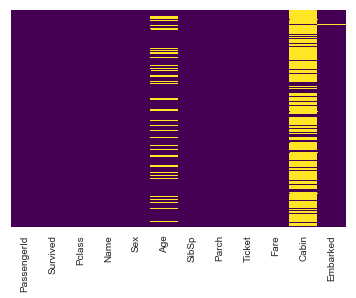

In [359]:
sns.heatmap(train.isnull(), yticklabels=False,cbar=False,cmap='viridis')

In [360]:
#median_age = train['Age'].median()
#train['Age'].fillna(value=median_age, inplace=True)

* Calcule o percentual de valores faltantes para cada coluna
    - Devemos eliminar a coluna "Age"? Qual a melhor forma de realizar um input para os valores faltantes?
    - E quanto a coluna "Cabin", o que devemos fazer? Será que poderíamos inferir esse valor com base no preço do ingresso e/ou portão de entrada?

In [361]:
rows = len(train.index)
not_null = train.count()/rows
percent_nulls = (1 - not_null)*100
percent_nulls

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

## + Atividades
- Veja o exemplo abaixo e realize as seguintes atividades

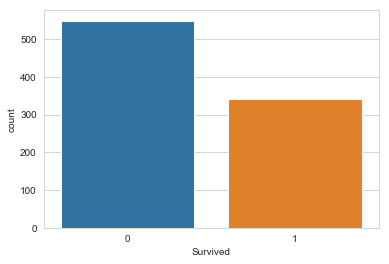

In [362]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

  - Plot os dados no countplot com a informação do SibSp

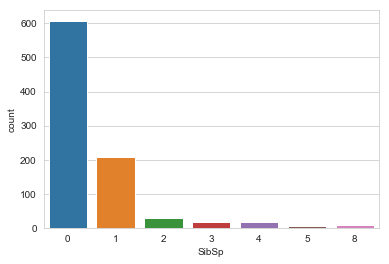

In [363]:
sns.countplot(x='SibSp',data=train)

- Morreram mais homens ou mulheres? Plot os dados no countplot com a informação do Sex no eixo e faça a distinção entre os sobreviventes. *(Dica: use o parâmetro hue)*

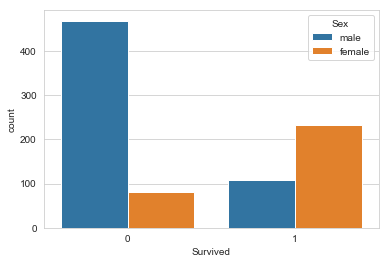

In [364]:
sns.countplot(x='Survived', hue='Sex', data=train)

 - Agora plot os dados no countplot com a informação do Pclass no eixo X. *(Dica: use o parâmetro hue)*

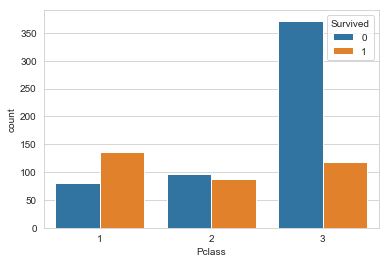

In [365]:
sns.countplot(x='Pclass', hue='Survived', data=train)

- Quais insights você consegue observar a partir destes novos gráficos? Discuta com seu parrceiro

- Veja o exemplo abaixo e onstrua um histograma considerando as informações contidas no Fare. Quais insights você consegue observar a partir destes gráficos?

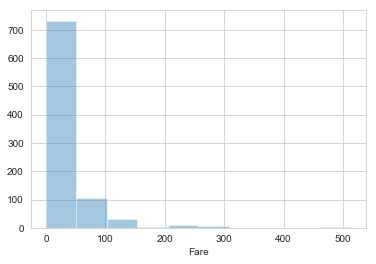

In [366]:
sns.distplot(train['Fare'].dropna(),kde=False, bins=10)

- Vamos plotar os dados dos tickets e verificar as classes

___
## 3. Limpeza dos Dados

Queremos preencher os dados que faltam em algumas amostras para o atributo Idade e também eliminar informações que não são úteis. Uma maneira de fazer isso é preencher com o valor da idade média de todos os passageiros. O que vocês acham? Há outra forma melhor de fazer? Vejam abaixo um exemplo de um box plot gráfico 

- Para visualizar detalhes de uma coluna você pode usar **dataframe['coluna'].describe()**
- Para recuperar a média você pode utilizar a função **mean** sobre a coluna
- Para preencher a coluna **Age** você pode criar uma função que retorne um valor, e posteriormente aplicar na coluna Age **df['column'] = df[['column']].apply(function, axis=1)**. 

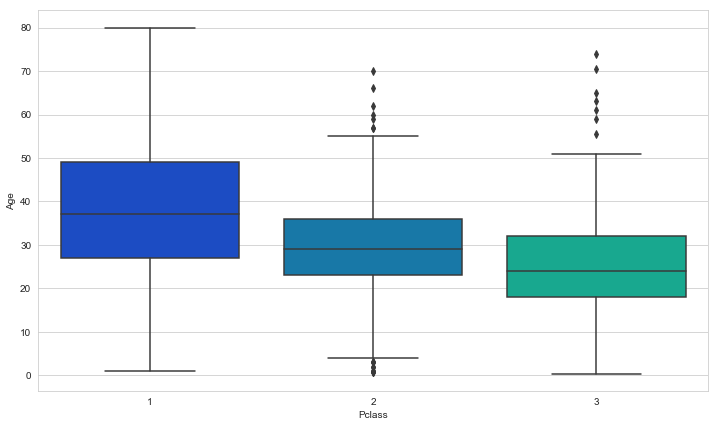

In [367]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

### Atividade

- Qual insight você tem a partir desse gráfico?
- Realize o input da coluna Age, considerando a mediana da idade pelo Pclass e não a mediana geral da Idade.
- Crie um novo mapa de calor
   
<!--
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age
dataset['Age'] = dataset[['Age','Pclass']].apply(impute_age,axis=1)
-->

In [368]:
train.groupby('Pclass').median()['Age']

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [369]:
train.groupby('Pclass')['Age'].median()

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [370]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

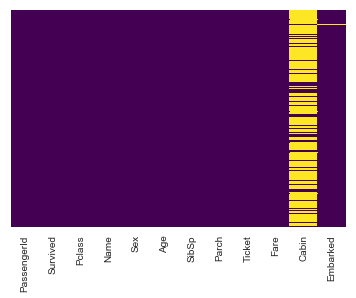

In [371]:
sns.heatmap(train.isnull(), yticklabels=False,cbar=False,cmap='viridis')

Ótimo! Vamos em frente ...

### + Atividades

* Elimine o atributo Cabin, Name e Ticket do nosso DataSet
* Visualize os primeiros elementos do DF **train** sem o atributo cabine
* Há ainda algum valor nulo? Vamos eliminá-lo! Para fazer isto use df.dropna(inplace=True). Quantos registros sobraram?

(Dica: use a função drop, por exemplo, df.drop('coluna',axis=1,inplace=True))

<!--
train.drop('Cabin',axis=1,inplace=True)
--->


In [372]:
train.drop('Cabin',axis=1,inplace=True)

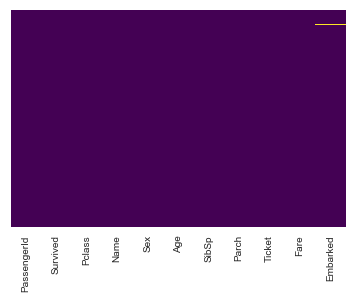

In [373]:
sns.heatmap(train.isnull(), yticklabels=False,cbar=False,cmap='viridis')

In [374]:
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [375]:
train.dropna(inplace=True)

In [376]:
train.count()

PassengerId    889
Survived       889
Pclass         889
Name           889
Sex            889
Age            889
SibSp          889
Parch          889
Ticket         889
Fare           889
Embarked       889
dtype: int64

## Criação e/ou Transformação

Precisamos converter atributos categóricos em variáveis numéricas usando pandas, a função **get_dummies** aplica o labelEncoding e OneHotEncoding!
Caso contrário, nosso algoritmo de ML não será apto para trabalhar com recursos diretamente categóricos como entradas.

# Atividade

* Veja o exemplo abaixo e refaça o mesmo processo para **todos** os atributos categóricos (por exemplo, o atributo **Embarked**)
    * Visualize como os seus dados estão ficando
    * Remova as variáveis que passaram pelo processo de one hot encoding

*PS: Você pode usar a função info() para visualizar informações do seu dataFrame*


In [377]:
train.drop(['Name'], axis=1, inplace=True)

In [378]:
train.drop(['Ticket'], axis=1, inplace=True)

In [379]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [382]:
sex = pd.get_dummies(train['Sex'], prefix='Gender', drop_first=True)
embarked = pd.get_dummies(train['Embarked'], prefix='Embarked')
pclass = pd.get_dummies(train['Pclass'], prefix='Class')

In [383]:
train = pd.concat([train,sex,embarked,pclass],axis=1)

In [384]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Gender_male,Embarked_C,Embarked_Q,Embarked_S,Class_1,Class_2,Class_3
0,1,0,3,male,22.0,1,0,7.2500,S,1,0,0,1,0,0,1
1,2,1,1,female,38.0,1,0,71.2833,C,0,1,0,0,1,0,0
2,3,1,3,female,26.0,0,0,7.9250,S,0,0,0,1,0,0,1
3,4,1,1,female,35.0,1,0,53.1000,S,0,0,0,1,1,0,0
4,5,0,3,male,35.0,0,0,8.0500,S,1,0,0,1,0,0,1


* Alguém pode explicar o que o código acima fez?
* Por quê não foram adicionadas as colunas "Female" e "C"?

## Desafios =D

- Que tal substituirmos o nome pelo prenome?

In [154]:
import re

def impute_name(name):
        pattern = re.search("\\,(.+?)\\.", name)
        found='Other'
        if pattern:
            found = pattern.group(1)
        return found

In [155]:
train['Name'] = train['Name'].apply(impute_name)
name = pd.get_dummies(train['Name'],prefix='Prenome')
train = pd.concat([train, name],axis=1)
train.drop(['Name'],axis=1,inplace=True)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender_male,Embarked_C,Embarked_Q,Embarked_S,Class_1,Class_2,Class_3,Prenome_ Capt,Prenome_ Col,Prenome_ Don,Prenome_ Dr,Prenome_ Jonkheer,Prenome_ Lady,Prenome_ Major,Prenome_ Master,Prenome_ Miss,Prenome_ Mlle,Prenome_ Mme,Prenome_ Mr,Prenome_ Mrs,Prenome_ Ms,Prenome_ Rev,Prenome_ Sir,Prenome_ the Countess
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,4,1,1,female,35.0,1,0,113803,53.1000,S,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,5,0,3,male,35.0,0,0,373450,8.0500,S,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


- Aplique normalização sobre as tarifas

In [156]:
def normalize(x, mean, std):
    z = (x - mean)/std
    return z

mean_fare = train['Fare'].mean()
std_fare = train['Fare'].std()
train['Z_Fare'] = train['Fare'].apply(normalize, args=(mean_fare, std_fare))

Existe alguma informação que você pode obter a partir do bilhete? Uma média de tarifa por exemplo, considerando a primeira letra do bilhete? Ou considerando o tamanho do bilhete

In [157]:
def new_ticket(ticket):
    nt = ticket[0]+"_"+str(len(ticket))
    return nt

train['New_Ticket'] = train['Ticket'].apply(new_ticket)

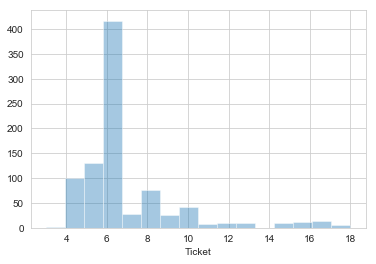

In [158]:
sns.distplot(train['Ticket'].apply(len).dropna(),kde=False, bins=16)

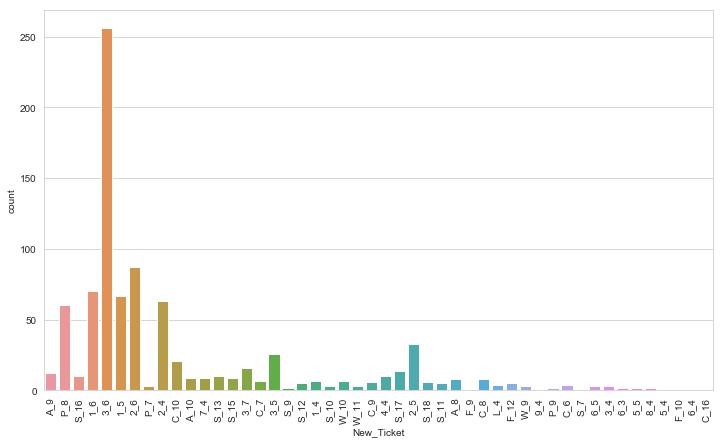

In [159]:
#nt_gb = train.groupby('New_Ticket').count()
#train['New_Ticket'].unique()
plt.figure(figsize=(12, 7))
ax = sns.countplot(x='New_Ticket', data=train)
plt.sca(ax)
plt.xticks(rotation=90);
#.plot.bar(width=.8, color='R')
#sns.countplot(x='New_Ticket', data=train, orient="h")

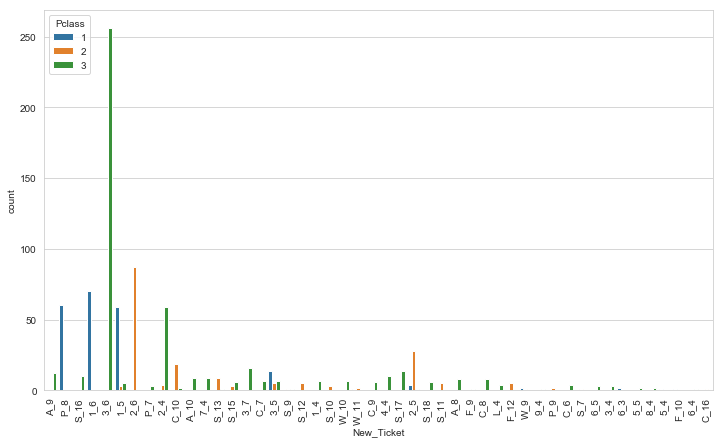

In [160]:
plt.figure(figsize=(12, 7))
ax = sns.countplot(x='New_Ticket', hue='Pclass', data=train)
plt.sca(ax)
plt.xticks(rotation=90);

In [161]:
train_selec = train[['New_Ticket','Embarked','Pclass']]
#sns.pairplot(train_selec, hue="Pclass")

In [162]:
a = train.groupby(['New_Ticket','Pclass'])['Fare'].mean()

In [163]:
new_df = a.reset_index()

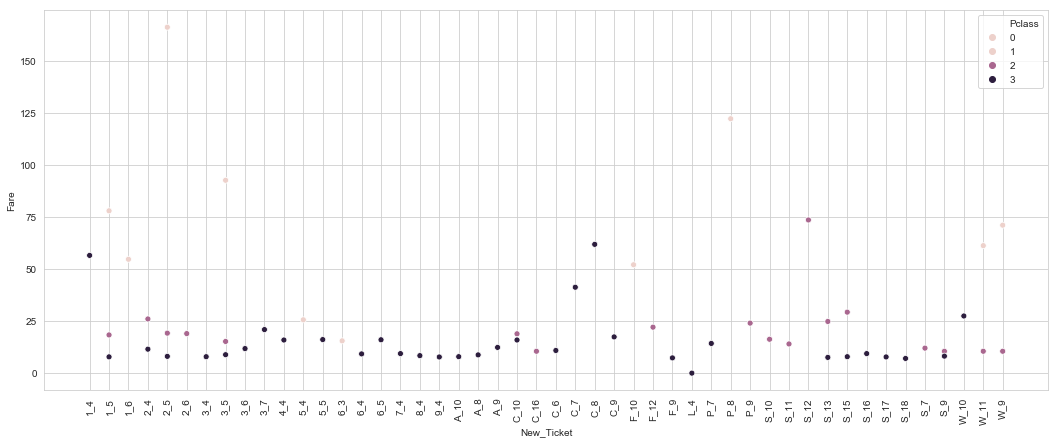

In [164]:
plt.figure(figsize=(18, 7))
ax = sns.scatterplot(x="New_Ticket", y="Fare", hue="Pclass", data=new_df)
plt.sca(ax)
plt.xticks(rotation=90);

- Talvez a cabine possa ser uma característica ... E se a cabine puder ser inferida? Como funcionava a divisão de cabines por classes ou idades
- Crie uma feature categórica com base na idade da pessoa, (por exemplo, criança, jovem, adulto e criança), no lugar da idade.
- Por onde entraram as pessoas que pagaram os ingressos mais caros?
- Crie um pipeline para o pré-processamento de features
- Aplique o pipeline sobre o dataset de titanic_test.csv

In [165]:
pd.set_option('max_columns',100)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender_male,Embarked_C,Embarked_Q,Embarked_S,Class_1,Class_2,Class_3,Prenome_ Capt,Prenome_ Col,Prenome_ Don,Prenome_ Dr,Prenome_ Jonkheer,Prenome_ Lady,Prenome_ Major,Prenome_ Master,Prenome_ Miss,Prenome_ Mlle,Prenome_ Mme,Prenome_ Mr,Prenome_ Mrs,Prenome_ Ms,Prenome_ Rev,Prenome_ Sir,Prenome_ the Countess,Z_Fare,New_Ticket
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,-0.499958,A_9
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.788503,P_8
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,-0.486376,S_16
3,4,1,1,female,35.0,1,0,113803,53.1000,S,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.422623,1_6
4,5,0,3,male,35.0,0,0,373450,8.0500,S,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,-0.483861,3_6


In [166]:
ticket = pd.get_dummies(train['New_Ticket'],prefix='Ticket')
train = pd.concat([train, ticket],axis=1)
train.drop(['New_Ticket'],axis=1,inplace=True)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender_male,Embarked_C,Embarked_Q,Embarked_S,Class_1,Class_2,Class_3,Prenome_ Capt,Prenome_ Col,Prenome_ Don,Prenome_ Dr,Prenome_ Jonkheer,Prenome_ Lady,Prenome_ Major,Prenome_ Master,Prenome_ Miss,Prenome_ Mlle,Prenome_ Mme,Prenome_ Mr,Prenome_ Mrs,Prenome_ Ms,Prenome_ Rev,Prenome_ Sir,Prenome_ the Countess,Z_Fare,Ticket_1_4,Ticket_1_5,Ticket_1_6,Ticket_2_4,Ticket_2_5,Ticket_2_6,Ticket_3_4,Ticket_3_5,Ticket_3_6,Ticket_3_7,Ticket_4_4,Ticket_5_4,Ticket_5_5,Ticket_6_3,Ticket_6_4,Ticket_6_5,Ticket_7_4,Ticket_8_4,Ticket_9_4,Ticket_A_10,Ticket_A_8,Ticket_A_9,Ticket_C_10,Ticket_C_16,Ticket_C_6,Ticket_C_7,Ticket_C_8,Ticket_C_9,Ticket_F_10,Ticket_F_12,Ticket_F_9,Ticket_L_4,Ticket_P_7,Ticket_P_8,Ticket_P_9,Ticket_S_10,Ticket_S_11,Ticket_S_12,Ticket_S_13,Ticket_S_15,Ticket_S_16,Ticket_S_17,Ticket_S_18,Ticket_S_7,Ticket_S_9,Ticket_W_10,Ticket_W_11,Ticket_W_9
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,-0.499958,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.788503,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,-0.486376,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,4,1,1,female,35.0,1,0,113803,53.1000,S,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.422623,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,3,male,35.0,0,0,373450,8.0500,S,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,-0.483861,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [167]:
train.drop(['Fare', 'PassengerId'],axis=1,inplace=True)
train.drop(['Sex', 'Embarked', 'Pclass', 'Ticket'],axis=1,inplace=True)
train.head()

,Survived,Age,SibSp,Parch,Gender_male,Embarked_C,Embarked_Q,Embarked_S,Class_1,Class_2,Class_3,Prenome_ Capt,Prenome_ Col,Prenome_ Don,Prenome_ Dr,Prenome_ Jonkheer,Prenome_ Lady,Prenome_ Major,Prenome_ Master,Prenome_ Miss,Prenome_ Mlle,Prenome_ Mme,Prenome_ Mr,Prenome_ Mrs,Prenome_ Ms,Prenome_ Rev,Prenome_ Sir,Prenome_ the Countess,Z_Fare,Ticket_1_4,Ticket_1_5,Ticket_1_6,Ticket_2_4,Ticket_2_5,Ticket_2_6,Ticket_3_4,Ticket_3_5,Ticket_3_6,Ticket_3_7,Ticket_4_4,Ticket_5_4,Ticket_5_5,Ticket_6_3,Ticket_6_4,Ticket_6_5,Ticket_7_4,Ticket_8_4,Ticket_9_4,Ticket_A_10,Ticket_A_8,Ticket_A_9,Ticket_C_10,Ticket_C_16,Ticket_C_6,Ticket_C_7,Ticket_C_8,Ticket_C_9,Ticket_F_10,Ticket_F_12,Ticket_F_9,Ticket_L_4,Ticket_P_7,Ticket_P_8,Ticket_P_9,Ticket_S_10,Ticket_S_11,Ticket_S_12,Ticket_S_13,Ticket_S_15,Ticket_S_16,Ticket_S_17,Ticket_S_18,Ticket_S_7,Ticket_S_9,Ticket_W_10,Ticket_W_11,Ticket_W_9
0,0,22.0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,-0.499958,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,38.0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.788503,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,26.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,-0.486376,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,35.0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.422623,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,35.0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,-0.483861,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [238]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import itertools

In [173]:
X_train, X_test, y_train, y_test = train_test_split(train.drop(['Survived'],axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

In [175]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [178]:
predictions = dtc.predict(X_test)

In [228]:
unique, counts = np.unique(y_test, return_counts=True)
unique, counts

(array([0, 1], dtype=int64), array([163, 104], dtype=int64))

In [244]:
labels = ['business', 'health']
cnf_matrix = confusion_matrix(y_test, predictions, labels=[1,0])
cnf_matrix

array([[ 77,  27],
       [ 26, 137]], dtype=int64)

In [216]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions, labels=[1,0]).ravel()
tn, fp, fn, tp 

(77, 27, 26, 137)

In [233]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[ 77  27]
 [ 26 137]]


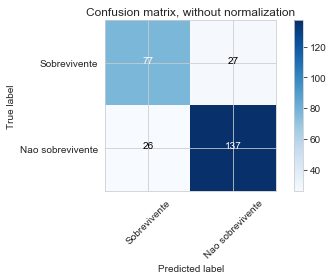

In [245]:
plot_confusion_matrix(cnf_matrix, classes=['Sobrevivente','Nao sobrevivente'],
                      title='Confusion matrix, without normalization')

In [179]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.84      0.84      0.84       163
          1       0.75      0.74      0.74       104

avg / total       0.80      0.80      0.80       267



In [205]:
df_import_features = dict(zip(train.drop(['Survived'],axis=1), dtc.feature_importances_))
df_import_features = pd.DataFrame.from_dict(df_import_features, orient='index', columns=['value'])
df_import_features = df_import_features.sort_values(['value'], ascending=False)
df_import_features

,value
Prenome_ Mr,0.301485
Z_Fare,0.211473
Age,0.168173
Class_3,0.065257
Parch,0.030548
Ticket_1_5,0.030456
Prenome_ Rev,0.026338
Ticket_1_4,0.021555
Embarked_S,0.018266
Prenome_ Miss,0.012667


,value
Prenome_ Mr,0.301485
Z_Fare,0.211473
Age,0.168173
Class_3,0.065257
Parch,0.030548
Ticket_1_5,0.030456
Prenome_ Rev,0.026338
Ticket_1_4,0.021555
Embarked_S,0.018266
Prenome_ Miss,0.012667


Data Science é o que há =D! 

Você pode querer explorar outras formas pré-processamento de dados ... fique a vontade =D!